In [1]:
from src.syntheticdata.processor import FactoryLoader, datasets

for k, v in datasets.items():
    print(f"Available datasets: {k}: {v}")

fl = FactoryLoader(datasets['av-redscience'])

# fl.factories

Available datasets: av-redscience: raw/txt/av
Available datasets: factorio-tech-json: raw/json/factorio-tech
Available datasets: factorio-tech: raw/csv/factorio-tech
Available datasets: factorio-codex: raw/csv/factorio-codex
Available datasets: idan: raw/csv/idan_blueprints.csv


In [1]:
from draftsman.data import items
from src.pipeline.loaders import FactoryLoader, RecipeWhitelist, Whitelist, Blacklist, Required, SizeRestrictor
from src.pipeline.loaders import MatrixLoader
from src.syntheticdata.processor import datasets

fl = FactoryLoader(datasets['factorio-tech'])
# banned = Blacklist(['pipe', 'beacon'])
allowed = RecipeWhitelist(['assembling-machine-1', 'transport-belt', 'inserter', 'small-electric-pole',
                           'underground-transport-belt', 'splitter',
                           'iron-gear-wheel', 'electronic-circuit', 'automation-science',
                           'steel-chest', 'iron-chest', 'wooden-chest', 'copper-cable'])
banned = Blacklist(['pipe', 'pipe-to-ground', 'storage-tank', 'electric-mining-drill', 'logistic-chest-requester',
                    'straight-rail', 'solar-panel', 'express-transport-belt', 'constant-combinator',
                    'ghost-scanner'])
requires_assembler = Required(['assembling-machine-1', 'assembling-machine-2', 'assembling-machine-3'])
requires_inserter = Required(['inserter', 'fast-inserter', 'bulk-inserter', 'long-armed-inserter'])

# transform_list = [allowed, banned, requires_assembler, requires_inserter]
filter_list = [Whitelist(items.raw.keys()),
            #    allowed,
               banned,
               requires_assembler,
               requires_inserter,
               SizeRestrictor(15, 15)]

ml = MatrixLoader(fl, center=True,
                  filters=filter_list)

lml = list(ml)

In [5]:
print(lml[6][0].blueprint.to_string())

0eNqlltuOmzAQht/F11DhA6e8QLUX7QtUqwhYN7UEBhlTNYp49zpsIrHBS2a8V0jY843/sT3+L6RuJzkYpS05XIiysiOH1b+ItFUtW/fvu5FSHxtlmknZ44+Xny9uUDW9Hsnh14WM6qSr9srQVSfd/GocZVe3Sp/irmr+KC1jRmYXot/kP3Kgc+QJsqbS49AbG7ukdjWdeafLVjbW9Fo18W1hqxCODxHza0T+SjOqXpNDJgTLSi5YziIitVVWyXex/tVGZOhHN+kaeyEOl3xLInJevi7HmzIu9TJ6552PeupqaW7luGF/V6ONlR6lsW5oQ2U3Kl2oDxwG59A9Dl9xnsmkcJkCgWVwbApXzfdUZ3CO2OPkCJkCLrNAYDkcW8JVp3uqaQIHZbsgihCaIS4ZQ3BTBJfDhRe7wgUclO+CUoTSAqE0Q3BzBBdzY0oEt4AXtNwt6PqSeJ+2T/sXX3hukWq4Bjf9MEgTN1XdSrLt3wk6TxqUh6LzFEF5GL41p96HjeN7sx8k8F3KD0rxl9UPytB7cS9V/nEvPOZmm2191cauatv4PcwFDf2yh58csMy7+AK9+PwLiy/xPql8bBNi63YSbE34B/gjjuLPqh/E8GfVD+JYgcUuLuCdgmwD5tW6m2sKeAb4+oZNzuubk+nd94nzBKHzAKcMAhcBJhIELgPcFaUAc58E2CsQmIaAk+cHTrCQUmzA2RbMA/wXqBQiwICBwCnqiuR7B86el4beT3aYPE1cZAFmD6Qhn1/n+T/6NoST


/Users/david/src/nyu/factorio-working-group/src/visualization.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


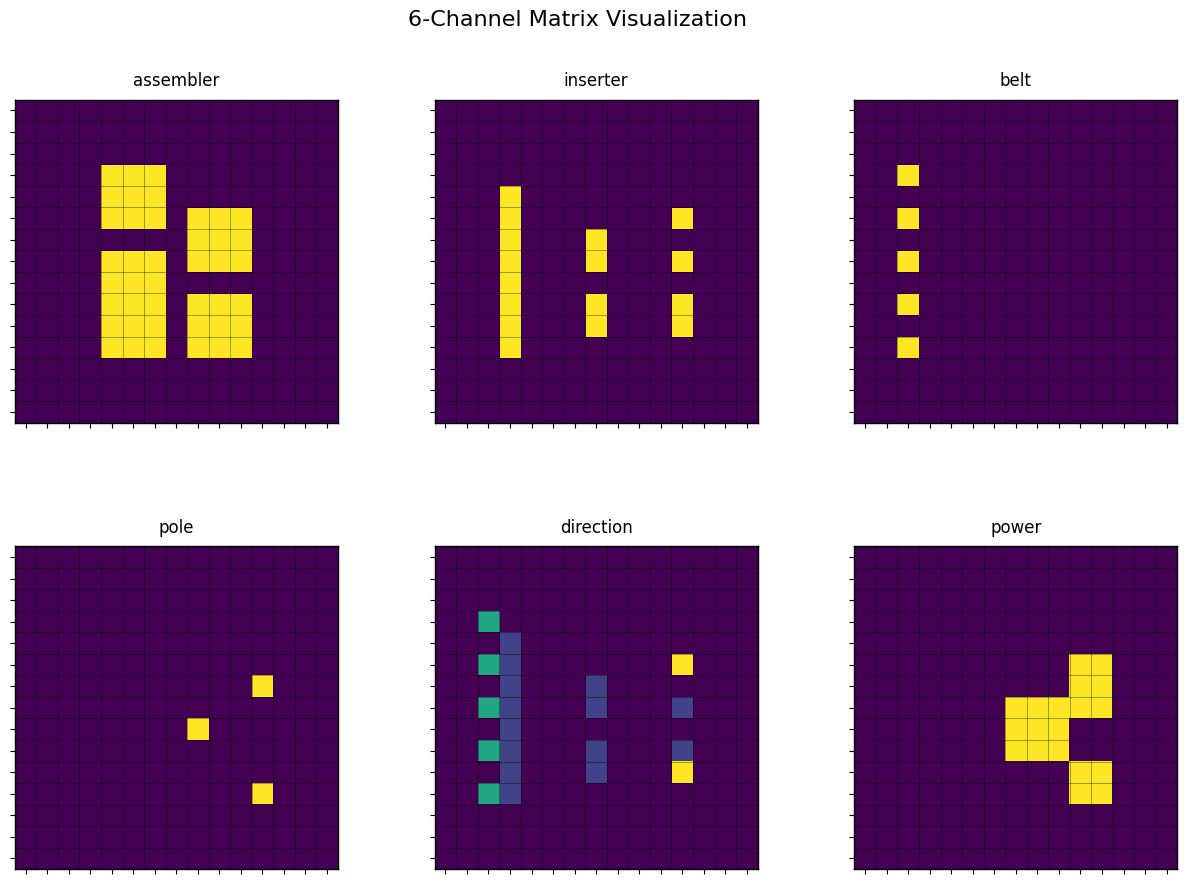

In [2]:
from src.visualization import visualize_multichannel_matrix

i = lml[6][1]
fig = visualize_multichannel_matrix(i)

In [7]:
from draftsman.data import items

items.raw.keys()

odict_keys(['wooden-chest', 'iron-chest', 'steel-chest', 'storage-tank', 'transport-belt', 'fast-transport-belt', 'express-transport-belt', 'turbo-transport-belt', 'underground-belt', 'fast-underground-belt', 'express-underground-belt', 'turbo-underground-belt', 'splitter', 'fast-splitter', 'express-splitter', 'turbo-splitter', 'loader', 'fast-loader', 'express-loader', 'turbo-loader', 'burner-inserter', 'inserter', 'long-handed-inserter', 'fast-inserter', 'bulk-inserter', 'stack-inserter', 'small-electric-pole', 'medium-electric-pole', 'big-electric-pole', 'substation', 'pipe', 'pipe-to-ground', 'pump', 'rail', 'rail-ramp', 'rail-support', 'train-stop', 'rail-signal', 'rail-chain-signal', 'locomotive', 'cargo-wagon', 'fluid-wagon', 'artillery-wagon', 'car', 'tank', 'spidertron', 'logistic-robot', 'construction-robot', 'active-provider-chest', 'passive-provider-chest', 'storage-chest', 'buffer-chest', 'requester-chest', 'roboport', 'small-lamp', 'arithmetic-combinator', 'decider-combin